# Training

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Tue Jul 26 14:43:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

# Dark-net 불러오기

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

# YOLOv4 Pre-Training Data 가져오기

In [6]:
!cp /mydrive/yolov3/data/yolov4.conv.137 /content/darknet/build/darknet/x64/yolov4.conv.137

In [ ]:
!echo -e '' > data/obj.names
!echo -e '' > data/obj.data
!cp /mydrive/yolov3/data/obj.names data/obj.names
!cp /mydrive/yolov3/data/obj.data data/obj.data
!mkdir data/obj

# Pre-Labeling Files 가져오기

In [ ]:
!unzip /mydrive/yolov3/data/valid.zip -d data/obj

# 파일 리스트 glob으로 생성.

In [9]:
from glob import glob
train_images_list = glob("/content/darknet/data/obj/train/images/*.jpg")
valid_images_list = glob("/content/darknet/data/obj/valid/images/*.jpg")

In [12]:
file = open("/content/darknet/build/darknet/x64/data/train.txt", "w") 
file.write("\n".join(train_images_list)) 
file.close() 

In [13]:
file = open("/content/darknet/build/darknet/x64/data/valid.txt", "w") 
file.write("\n".join(valid_images_list)) 
file.close() 

# Training!

In [14]:
%cd /content/darknet

/content/darknet


In [ ]:
#colab run-time 때문에 iou 수치가 낮다. 
!./darknet detector train /content/darknet/build/darknet/x64/data/obj.data /content/darknet/build/darknet/x64/cfg/yolov4-obj.cfg /content/darknet/build/darknet/x64/yolov4.conv.137 -dont_show

# 이미지로 결과보기

In [20]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img_path = '/content/darknet/chart.png'

img = cv2.imread(img_path)
cv2_imshow(img)

In [ ]:
%cd /content/darknet/build/darknet/x64/cfg/
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

In [ ]:
%cd /content/darknet

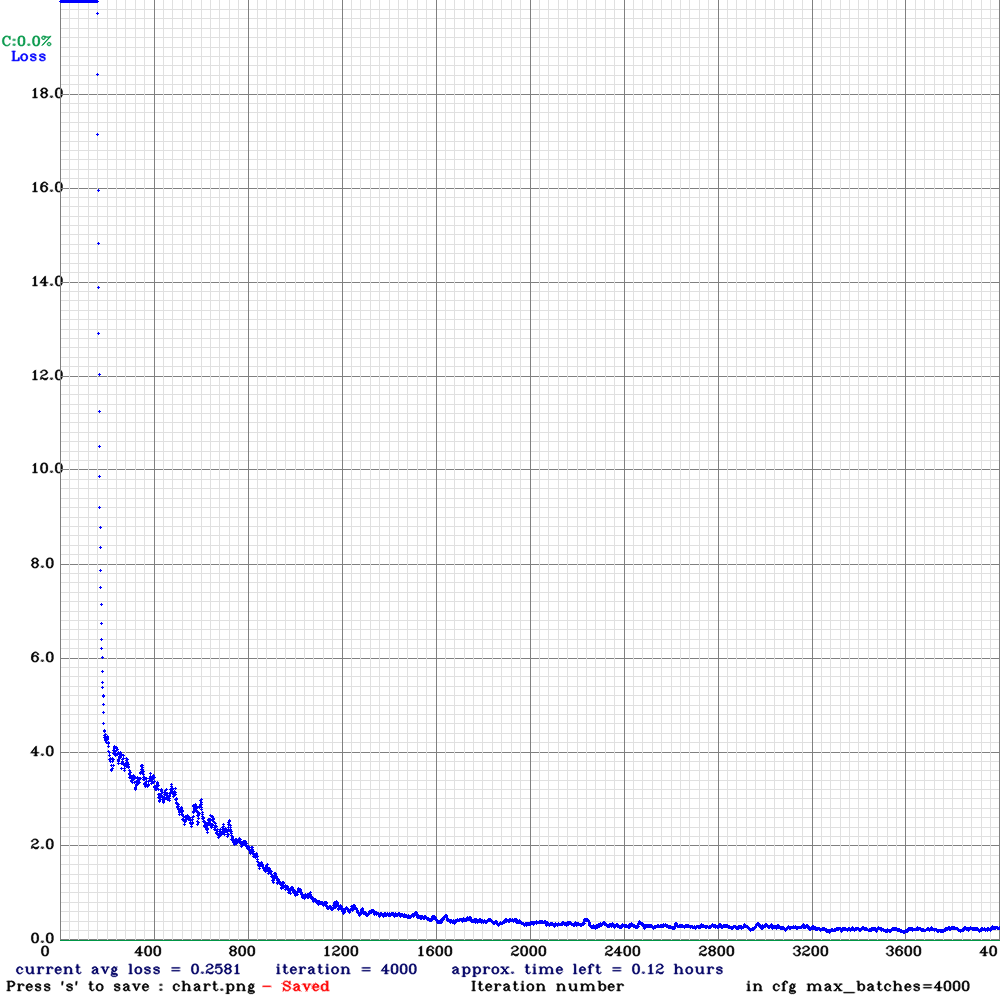

In [41]:
import cv2
from google.colab.patches import cv2_imshow

img_path = '/content/darknet/chart.png'

img = cv2.imread(img_path)
cv2_imshow(img)

In [ ]:
! ./darknet detector test /content/darknet/build/darknet/x64/data/obj.data  /content/darknet/build/darknet/x64/cfg/yolov4-obj.cfg  /content/darknet/backup/yolov4-obj_final.weights /content/darknet/data/obj/valid/images/csgo1628698505378619400_png_jpg.rf.1a187d75bbf2125cdf0315670153a456.jpg -dont_show -ext_output

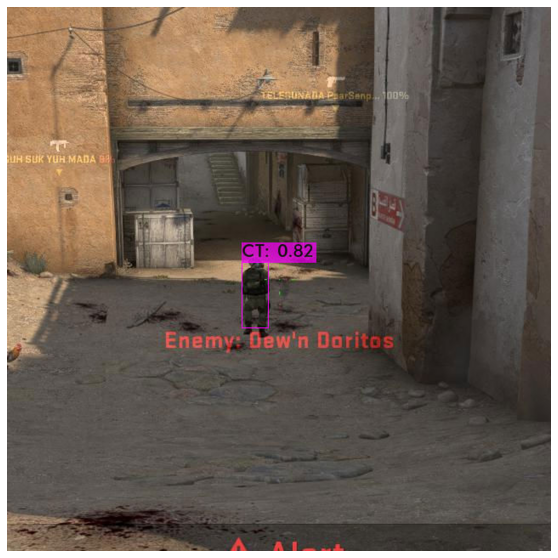

In [39]:
imShow('predictions.jpg')

In [ ]:
! ./darknet detector demo /content/darknet/build/darknet/x64/data/obj.data /content/darknet/build/darknet/x64/cfg/yolov4-obj.cfg /content/darknet/backup/yolov4-obj_final.weights /content/drive/MyDrive/yolov3/data/play.mp4 -dont_show -ext_output 0.5 -i 0 -out_filename /content/drive/MyDrive/yolov3/results1.avi

# 실행부

In [ ]:
import numpy as np
import pyautogui
import win32api, win32con, win32gui
import cv2
import math
import time

prevTime = 0
prevTime = 0
CONFIG_FILE = 'C:/Users/ssky2/PycharmProjects/pythonProject/yolov4.cfg'
WEIGHT_FILE = 'C:/Users/ssky2/PycharmProjects/pythonProject/yolov4.weights'

#GPU 사용하면서 yolo 사용
darknett = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHT_FILE)
darknett.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
darknett.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

nn = darknett.getLayerNames()
nn = [nn[i-1] for i in darknett.getUnconnectedOutLayers()] #['yolo_82', 'yolo_94', 'yolo_106']

def get_windows():
    #CSGO Window 가져오기
    wnd = win32gui.FindWindow(None, 'Counter-Strike: Global Offensive - Direct3D 9')
    #윈도우 좌표 반환, (x, y, w, h)
    rect = win32gui.GetClientRect(wnd)
    #rect = win32gui.GetWindowRect(wnd)
    #(x, y, w-x, h-y)
    square = rect[0], rect[1], rect[2] - rect[0], rect[3] - rect[1]
    return square

#https://deep-learning-study.tistory.com/299

def action_func():
    while True:
        square = get_windows()

# 함수를 토대로 좌표생성
        frame = np.array(pyautogui.screenshot(region=square))
        frame_width, frame_height = frame.shape[:2]

#좌표생성 후, blob을 통해 weights로 이미지 forward 진행.
#(입력 영상, 정규화, 출력 영상 크기, RGB -> RBG변환를 해준다)
#이때 가장 중요한 것이, 출력 영상 크기인데 출력 영상이 커지면 내뱉은 프레임이 작아진다.
#즉, Frame(성능)과 출력 영상은 반비례 관계

        blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (128, 128), swapRB=True)
#다크넷에 영상 입력
        darknett.setInput(blob)
#다크넷으로 영상 추론
#이때, 내뱉는 녀석의 column 수는 순서대로 x,y,w,h, confidence, class 수 (해당 클래스일 확률)
        forward_inference = darknett.forward(nn)

#추론 한대로 사각형을 만들어서 bounding box를 만들어주자.
 #또한, confidence를 통해서 일정 확률 이상이 아니면 버리는걸로 하자.

        rectangle = []
        confidences = []

        for out in forward_inference:
            for idx in out:
#가장 높은 스코어중에서 하나만 가져오도록 하자.
                max_score = np.max(idx[5:])
                confidence = idx[4]
#rectangle 만들기
                if confidence > 0.7: #편의상 0.7 너무 높으면 탐지가 잘 안되더라.
                    box = idx[:4] * np.array([frame_width, frame_height, frame_width, frame_height])
                    (Cx, Cy, width, height) = box.astype('int') 
                    x = int(Cx - (width / 2))
                    y = int(Cy - (height / 2))
                    box = [x, y, int(width), int(height)]
                    rectangle.append(box)
                    confidences.append(confidence)
        
# 비최대 억제
        ''' https://ghdrldud329.tistory.com/59
        한 객체에 여러 바운딩 박스가 있으므로 이 여러 박스 중 가장 좋은 박스를 뽑아내기
        예를들어 두 박스가 있는데 이 겹쳐진 부분이 nmsThreshold%만큼 겹쳐진 것들중
        confidence 값이 confThreshold이상인 것들중에 가장 큰 confidence를 갖는 하나만 골라서 
        indices에 넣기(몇번째 박스인지에 대한 정보)
        #정리:40% 이상 겹치는 바운딩 박스에 대해 최대 confidence (>0.5)바운딩 박스만 선별
        #nmsThreshold값이 0.99라면 99%이상의 공간을 같이 공유하는 박스들이 겹치게 될것
        '''

        NMS = cv2.dnn.NMSBoxes(rectangle, confidences, 0.7, 0.6)

        if len(NMS) > 0:
            print(f'Take! : {len(NMS)}')
            min = 999999
            min_points = 0

#주어진 값으로 사각형 필드 생성
            for i in NMS.flatten():
                (x, y) = (rectangle[i][0], rectangle[i][1])
                (w, h) = (rectangle[i][2], rectangle[i][3])
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

#두 점간의 거리 구하기
                distances = np.sqrt(np.power(frame_width/2 - (x+w/2), 2) + np.power(frame_height/2) - (y+h/2), 2)

                if distances < min:
                    min = distances
                    min_points = i

#크로스헤어 위치 수정하기.
            x = int(rectangle[min_points][0] + rectangle[min_points][2] / 2 - frame_width / 2)

#이때, 헤드샷을 하고 싶은 경우는 다음과 같음.
            y = int(rectangle[min_points][1] + rectangle[min_points][3] / 2 - frame_height / 2) - (rectangle[min_points][3] * 0.5)

            x = int(x * 1.5)
            y = int(y * 1.5)

            win32api.mouse_event(win32con.MOUSEEVENTF_MOVE, x, y, 0, 0)
            time.sleep(0.05)
            win32api.mouse_event(win32con.MOUSEEVENTF_LEFTDOWN, x, y, 0, 0)
            time.sleep(0.1)
            win32api.mouse_event(win32con.MOUSEEVENTF_LEFTUP, x, y, 0, 0)

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (frame.shape[1] // 2, frame.shape[0] // 2))

        cv2.imshow("frame", frame)
        cv2.waitKey(1)

action_func()